In [1]:
#@title Copyright 2020 Google LLC. Double-click here for license information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Simple Linear Regression with Synthetic Data

In this first Colab, you'll explore linear regression with a simple database. 

## Learning objectives:

After doing this exercise, you'll know how to do the following:

  * Run Colabs.
  * Tune the following [hyperparameters](https://developers.google.com/machine-learning/glossary/#hyperparameter):
    * [learning rate](https://developers.google.com/machine-learning/glossary/#learning_rate)
    * number of [epochs](https://developers.google.com/machine-learning/glossary/#epoch)
    * [batch size](https://developers.google.com/machine-learning/glossary/#batch_size)
  * Interpret different kinds of [loss curves](https://developers.google.com/machine-learning/glossary/#loss_curve).

## About Colabs

Machine Learning Crash Course uses Colaboratories (**Colabs**) for all programming exercises. Colab is Google's implementation of [Jupyter Notebook](https://jupyter.org/). Like all Jupyter Notebooks, a Colab consists of two kinds of components:

  * **Text cells**, which contain explanations. You are currently reading a text cell.
  * **Code cells**, which contain Python code for you to run. Code cells have a light gray background.

You *read* the text cells and *run* the code cells.

### Running code cells

You must run code cells in order. In other words, you may only run a code cell once all the code cells preceding it have already been run. 

To run a code cell:

  1. Place the cursor anywhere inside the [ ] area at the top left of a code cell. The area inside the [ ] will display an arrow.
  2. Click the arrow.

Alternatively, you may invoke **Runtime->Run all**. Note, though, that some of the code cells will fail because not all the coding is complete. (You'll complete the coding as part of the exercise.)

### Understanding hidden code cells

We've **hidden** the code in code cells that don't advance the learning objectives. For example, we've hidden the code that plots graphs. However, **you must still run code cells containing hidden code**. You'll know that the code is hidden because you'll see a title (for example, "Load the functions that build and train a model") without seeing the code.

To view the hidden code, just double click the header.

### Why did you see an error?

If a code cell returns an error when you run it, consider two common problems:

  * You didn't run *all* of the code cells preceding the current code cell.
  * If the code cell is labeled as a **Task**, then you haven't written the necessary code. 

## Use the right version of TensorFlow

The following hidden code cell ensures that the Colab will run on TensorFlow 2.X, which is the most recent version of TensorFlow:

## Import relevant modules

The following cell imports the packages that the program requires:

In [2]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

## Define functions that build and train a model

The following code defines two functions:

  * `build_model(my_learning_rate)`, which builds an empty model.
  * `train_model(model, feature, label, epochs)`, which trains the model from the examples (feature and label) you pass. 

Since you don't need to understand model building code right now, we've hidden this code cell.  You may optionally double-click the headline to explore this code.

In [3]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


## Define plotting functions

We're using a popular Python library called [Matplotlib](https://developers.google.com/machine-learning/glossary/#matplotlib) to create the following two plots:

*  a plot of the feature values vs. the label values, and a line showing the output of the trained model.
*  a [loss curve](https://developers.google.com/machine-learning/glossary/#loss_curve).

We hid the following code cell because learning Matplotlib is not relevant to the learning objectives. Regardless, you must still run all hidden code cells.

In [4]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = my_feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


## Define the dataset

The dataset consists of 12 [examples](https://developers.google.com/machine-learning/glossary/#example). Each example consists of one [feature](https://developers.google.com/machine-learning/glossary/#feature) and one [label](https://developers.google.com/machine-learning/glossary/#label).


In [5]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

## Specify the hyperparameters

The hyperparameters in this Colab are as follows:

  * [learning rate](https://developers.google.com/machine-learning/glossary/#learning_rate)
  * [epochs](https://developers.google.com/machine-learning/glossary/#epoch)
  * [batch_size](https://developers.google.com/machine-learning/glossary/#batch_size)

The following code cell initializes these hyperparameters and then invokes the functions that build and train the model.

Train on 12 samples
Epoch 1/10
12/12 [==============================] - 0s 26ms/sample - loss: 834.6277 - root_mean_squared_error: 28.8899
Epoch 2/10
12/12 [==============================] - 0s 4ms/sample - loss: 819.6218 - root_mean_squared_error: 28.6290
Epoch 3/10
12/12 [==============================] - 0s 499us/sample - loss: 808.8670 - root_mean_squared_error: 28.4406
Epoch 4/10
12/12 [==============================] - 0s 582us/sample - loss: 799.9398 - root_mean_squared_error: 28.2832
Epoch 5/10
12/12 [==============================] - 0s 499us/sample - loss: 792.0720 - root_mean_squared_error: 28.1438
Epoch 6/10
12/12 [==============================] - 0s 665us/sample - loss: 784.9077 - root_mean_squared_error: 28.0162
Epoch 7/10
12/12 [==============================] - 0s 667us/sample - loss: 778.2485 - root_mean_squared_error: 27.8971
Epoch 8/10
12/12 [==============================] - 0s 914us/sample - loss: 771.9717 - root_mean_squared_error: 27.7844
Epoch 9/10
12/12 [=====

C:\Users\Christopher.Chapa\Anaconda3\envs\tensorflow-development\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


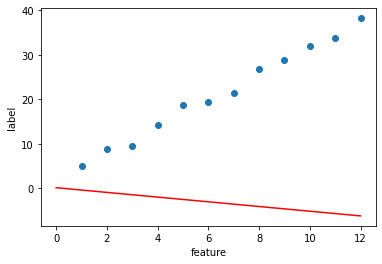

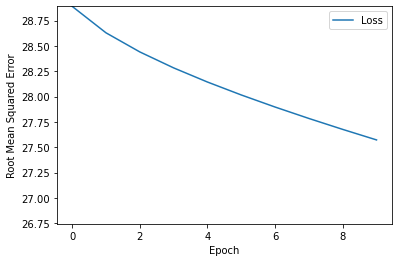

In [6]:
learning_rate=0.01
epochs=10
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Task 1: Examine the graphs

Examine the top graph. The blue dots identify the actual data; the red line identifies the output of the trained model. Ideally, the red line should align nicely with the blue dots.  Does it?  Probably not.

A certain amount of randomness plays into training a model, so you'll get somewhat different results every time you train.  That said, unless you are an extremely lucky person, the red line probably *doesn't* align nicely with the blue dots.  

Examine the bottom graph, which shows the loss curve. Notice that the loss curve decreases but doesn't flatten out, which is a sign that the model hasn't trained sufficiently.

## Task 2: Increase the number of epochs

Training loss should steadily decrease, steeply at first, and then more slowly. Eventually, training loss should eventually stay steady (zero slope or nearly zero slope), which indicates that training has [converged](http://developers.google.com/machine-learning/glossary/#convergence).

In Task 1, the training loss did not converge. One possible solution is to train for more epochs.  Your task is to increase the number of epochs sufficiently to get the model to converge. However, it is inefficient to train past convergence, so don't just set the number of epochs to an arbitrarily high value.

Examine the loss curve. Does the model converge?

Train on 12 samples
Epoch 1/400
12/12 [==============================] - 0s 19ms/sample - loss: 583.5153 - root_mean_squared_error: 24.1561
Epoch 2/400
12/12 [==============================] - 0s 665us/sample - loss: 570.9805 - root_mean_squared_error: 23.8952
Epoch 3/400
12/12 [==============================] - 0s 748us/sample - loss: 562.0186 - root_mean_squared_error: 23.7069
Epoch 4/400
12/12 [==============================] - 0s 495us/sample - loss: 554.5923 - root_mean_squared_error: 23.5498
Epoch 5/400
12/12 [==============================] - 0s 831us/sample - loss: 548.0569 - root_mean_squared_error: 23.4106
Epoch 6/400
12/12 [==============================] - 0s 746us/sample - loss: 542.1133 - root_mean_squared_error: 23.2833
Epoch 7/400
12/12 [==============================] - 0s 746us/sample - loss: 536.5954 - root_mean_squared_error: 23.1645
Epoch 8/400
12/12 [==============================] - 0s 665us/sample - loss: 531.3998 - root_mean_squared_error: 23.0521
Epoch 9/400
1

12/12 [==============================] - 0s 665us/sample - loss: 325.6860 - root_mean_squared_error: 18.0468
Epoch 69/400
12/12 [==============================] - 0s 582us/sample - loss: 322.8314 - root_mean_squared_error: 17.9675
Epoch 70/400
12/12 [==============================] - 0s 499us/sample - loss: 319.9900 - root_mean_squared_error: 17.8883
Epoch 71/400
12/12 [==============================] - 0s 665us/sample - loss: 317.1617 - root_mean_squared_error: 17.8090
Epoch 72/400
12/12 [==============================] - 0s 499us/sample - loss: 314.3466 - root_mean_squared_error: 17.7298
Epoch 73/400
12/12 [==============================] - 0s 582us/sample - loss: 311.5448 - root_mean_squared_error: 17.6506
Epoch 74/400
12/12 [==============================] - 0s 582us/sample - loss: 308.7561 - root_mean_squared_error: 17.5715
Epoch 75/400
12/12 [==============================] - 0s 499us/sample - loss: 305.9805 - root_mean_squared_error: 17.4923
Epoch 76/400
12/12 [=================

Epoch 135/400
12/12 [==============================] - 0s 831us/sample - loss: 163.2751 - root_mean_squared_error: 12.7779
Epoch 136/400
12/12 [==============================] - 0s 748us/sample - loss: 161.2910 - root_mean_squared_error: 12.7000
Epoch 137/400
12/12 [==============================] - 0s 665us/sample - loss: 159.3198 - root_mean_squared_error: 12.6222
Epoch 138/400
12/12 [==============================] - 0s 748us/sample - loss: 157.3615 - root_mean_squared_error: 12.5444
Epoch 139/400
12/12 [==============================] - 0s 748us/sample - loss: 155.4159 - root_mean_squared_error: 12.4666
Epoch 140/400
12/12 [==============================] - 0s 665us/sample - loss: 153.4832 - root_mean_squared_error: 12.3888
Epoch 141/400
12/12 [==============================] - 0s 665us/sample - loss: 151.5634 - root_mean_squared_error: 12.3111
Epoch 142/400
12/12 [==============================] - 0s 665us/sample - loss: 149.6563 - root_mean_squared_error: 12.2334
Epoch 143/400
12

12/12 [==============================] - 0s 748us/sample - loss: 58.4529 - root_mean_squared_error: 7.6455
Epoch 203/400
12/12 [==============================] - 0s 914us/sample - loss: 57.3149 - root_mean_squared_error: 7.5707
Epoch 204/400
12/12 [==============================] - 0s 831us/sample - loss: 56.1893 - root_mean_squared_error: 7.4959
Epoch 205/400
12/12 [==============================] - 0s 914us/sample - loss: 55.0759 - root_mean_squared_error: 7.4213
Epoch 206/400
12/12 [==============================] - 0s 748us/sample - loss: 53.9748 - root_mean_squared_error: 7.3468
Epoch 207/400
12/12 [==============================] - 0s 665us/sample - loss: 52.8860 - root_mean_squared_error: 7.2723
Epoch 208/400
12/12 [==============================] - 0s 831us/sample - loss: 51.8095 - root_mean_squared_error: 7.1979
Epoch 209/400
12/12 [==============================] - 0s 831us/sample - loss: 50.7453 - root_mean_squared_error: 7.1236
Epoch 210/400
12/12 [=========================

Epoch 270/400
12/12 [==============================] - 0s 997us/sample - loss: 8.2116 - root_mean_squared_error: 2.8656
Epoch 271/400
12/12 [==============================] - 0s 1ms/sample - loss: 7.8620 - root_mean_squared_error: 2.8039
Epoch 272/400
12/12 [==============================] - 0s 997us/sample - loss: 7.5226 - root_mean_squared_error: 2.7427
Epoch 273/400
12/12 [==============================] - 0s 914us/sample - loss: 7.1935 - root_mean_squared_error: 2.6821
Epoch 274/400
12/12 [==============================] - 0s 1ms/sample - loss: 6.8745 - root_mean_squared_error: 2.6219
Epoch 275/400
12/12 [==============================] - 0s 997us/sample - loss: 6.5655 - root_mean_squared_error: 2.5623
Epoch 276/400
12/12 [==============================] - 0s 748us/sample - loss: 6.2665 - root_mean_squared_error: 2.5033
Epoch 277/400
12/12 [==============================] - 0s 997us/sample - loss: 5.9774 - root_mean_squared_error: 2.4449
Epoch 278/400
12/12 [=======================

Epoch 339/400
12/12 [==============================] - 0s 1ms/sample - loss: 0.9635 - root_mean_squared_error: 0.9816
Epoch 340/400
12/12 [==============================] - 0s 998us/sample - loss: 0.9619 - root_mean_squared_error: 0.9807
Epoch 341/400
12/12 [==============================] - 0s 1ms/sample - loss: 0.9602 - root_mean_squared_error: 0.9799
Epoch 342/400
12/12 [==============================] - 0s 1ms/sample - loss: 0.9585 - root_mean_squared_error: 0.9790
Epoch 343/400
12/12 [==============================] - 0s 1ms/sample - loss: 0.9567 - root_mean_squared_error: 0.9781
Epoch 344/400
12/12 [==============================] - 0s 997us/sample - loss: 0.9550 - root_mean_squared_error: 0.9772
Epoch 345/400
12/12 [==============================] - 0s 997us/sample - loss: 0.9532 - root_mean_squared_error: 0.9763
Epoch 346/400
12/12 [==============================] - 0s 1ms/sample - loss: 0.9514 - root_mean_squared_error: 0.9754
Epoch 347/400
12/12 [=============================

C:\Users\Christopher.Chapa\Anaconda3\envs\tensorflow-development\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


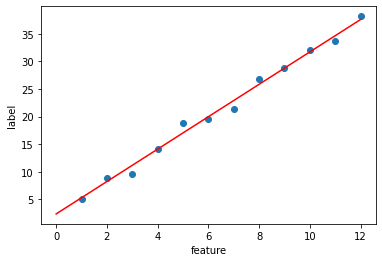

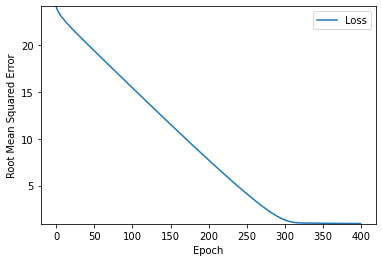

In [16]:
learning_rate=0.01
epochs= 400   # Replace ? with an integer.
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Train on 12 samples
Epoch 1/450
12/12 [==============================] - 0s 29ms/sample - loss: 1091.5848 - root_mean_squared_error: 33.0391
Epoch 2/450
12/12 [==============================] - 0s 665us/sample - loss: 1074.4135 - root_mean_squared_error: 32.7782
Epoch 3/450
12/12 [==============================] - 0s 665us/sample - loss: 1062.0879 - root_mean_squared_error: 32.5897
Epoch 4/450
12/12 [==============================] - 0s 914us/sample - loss: 1051.8456 - root_mean_squared_error: 32.4322
Epoch 5/450
12/12 [==============================] - 0s 748us/sample - loss: 1042.8103 - root_mean_squared_error: 32.2926
Epoch 6/450
12/12 [==============================] - 0s 975us/sample - loss: 1034.5762 - root_mean_squared_error: 32.1648
Epoch 7/450
12/12 [==============================] - 0s 998us/sample - loss: 1026.9171 - root_mean_squared_error: 32.0455
Epoch 8/450
12/12 [==============================] - 0s 1ms/sample - loss: 1019.6926 - root_mean_squared_error: 31.9326
Epoch 9

Epoch 69/450
12/12 [==============================] - 0s 915us/sample - loss: 718.1461 - root_mean_squared_error: 26.7982
Epoch 70/450
12/12 [==============================] - 0s 1ms/sample - loss: 713.8486 - root_mean_squared_error: 26.7179
Epoch 71/450
12/12 [==============================] - 0s 1ms/sample - loss: 709.5646 - root_mean_squared_error: 26.6377
Epoch 72/450
12/12 [==============================] - 0s 1ms/sample - loss: 705.2939 - root_mean_squared_error: 26.5574
Epoch 73/450
12/12 [==============================] - 0s 1ms/sample - loss: 701.0368 - root_mean_squared_error: 26.4771
Epoch 74/450
12/12 [==============================] - 0s 1ms/sample - loss: 696.7929 - root_mean_squared_error: 26.3968
Epoch 75/450
12/12 [==============================] - 0s 1ms/sample - loss: 692.5625 - root_mean_squared_error: 26.3166
Epoch 76/450
12/12 [==============================] - 0s 2ms/sample - loss: 688.3454 - root_mean_squared_error: 26.2363
Epoch 77/450
12/12 [==================

Epoch 137/450
12/12 [==============================] - 0s 1ms/sample - loss: 456.1577 - root_mean_squared_error: 21.3578
Epoch 138/450
12/12 [==============================] - 0s 1ms/sample - loss: 452.7604 - root_mean_squared_error: 21.2782
Epoch 139/450
12/12 [==============================] - 0s 1ms/sample - loss: 449.3763 - root_mean_squared_error: 21.1985
Epoch 140/450
12/12 [==============================] - 0s 997us/sample - loss: 446.0054 - root_mean_squared_error: 21.1188
Epoch 141/450
12/12 [==============================] - 0s 1ms/sample - loss: 442.6476 - root_mean_squared_error: 21.0392
Epoch 142/450
12/12 [==============================] - 0s 997us/sample - loss: 439.3030 - root_mean_squared_error: 20.9596
Epoch 143/450
12/12 [==============================] - 0s 1ms/sample - loss: 435.9715 - root_mean_squared_error: 20.8799
Epoch 144/450
12/12 [==============================] - 0s 1ms/sample - loss: 432.6532 - root_mean_squared_error: 20.8003
Epoch 145/450
12/12 [=======

Epoch 205/450
12/12 [==============================] - 0s 1ms/sample - loss: 255.0180 - root_mean_squared_error: 15.9693
Epoch 206/450
12/12 [==============================] - 0s 997us/sample - loss: 252.5107 - root_mean_squared_error: 15.8906
Epoch 207/450
12/12 [==============================] - 0s 914us/sample - loss: 250.0164 - root_mean_squared_error: 15.8119
Epoch 208/450
12/12 [==============================] - 0s 1ms/sample - loss: 247.5350 - root_mean_squared_error: 15.7332
Epoch 209/450
12/12 [==============================] - 0s 1ms/sample - loss: 245.0667 - root_mean_squared_error: 15.6546
Epoch 210/450
12/12 [==============================] - 0s 997us/sample - loss: 242.6114 - root_mean_squared_error: 15.5760
Epoch 211/450
12/12 [==============================] - 0s 1ms/sample - loss: 240.1690 - root_mean_squared_error: 15.4974
Epoch 212/450
12/12 [==============================] - 0s 997us/sample - loss: 237.7396 - root_mean_squared_error: 15.4188
Epoch 213/450
12/12 [===

Epoch 273/450
12/12 [==============================] - 0s 1ms/sample - loss: 113.9444 - root_mean_squared_error: 10.6745
Epoch 274/450
12/12 [==============================] - 0s 1ms/sample - loss: 112.3119 - root_mean_squared_error: 10.5977
Epoch 275/450
12/12 [==============================] - 0s 1ms/sample - loss: 110.6921 - root_mean_squared_error: 10.5210
Epoch 276/450
12/12 [==============================] - 0s 1ms/sample - loss: 109.0849 - root_mean_squared_error: 10.4444
Epoch 277/450
12/12 [==============================] - 0s 1ms/sample - loss: 107.4904 - root_mean_squared_error: 10.3678
Epoch 278/450
12/12 [==============================] - 0s 1ms/sample - loss: 105.9086 - root_mean_squared_error: 10.2912
Epoch 279/450
12/12 [==============================] - 0s 1ms/sample - loss: 104.3395 - root_mean_squared_error: 10.2147
Epoch 280/450
12/12 [==============================] - 0s 1ms/sample - loss: 102.7830 - root_mean_squared_error: 10.1382
Epoch 281/450
12/12 [===========

Epoch 342/450
12/12 [==============================] - 0s 1ms/sample - loss: 30.5929 - root_mean_squared_error: 5.5311
Epoch 343/450
12/12 [==============================] - 0s 1ms/sample - loss: 29.8122 - root_mean_squared_error: 5.4601
Epoch 344/450
12/12 [==============================] - 0s 1ms/sample - loss: 29.0434 - root_mean_squared_error: 5.3892
Epoch 345/450
12/12 [==============================] - 0s 2ms/sample - loss: 28.2863 - root_mean_squared_error: 5.3185
Epoch 346/450
12/12 [==============================] - 0s 1ms/sample - loss: 27.5410 - root_mean_squared_error: 5.2480
Epoch 347/450
12/12 [==============================] - 0s 1ms/sample - loss: 26.8075 - root_mean_squared_error: 5.1776
Epoch 348/450
12/12 [==============================] - 0s 1ms/sample - loss: 26.0857 - root_mean_squared_error: 5.1074
Epoch 349/450
12/12 [==============================] - 0s 1ms/sample - loss: 25.3755 - root_mean_squared_error: 5.0374
Epoch 350/450
12/12 [===========================

Epoch 411/450
12/12 [==============================] - 0s 955us/sample - loss: 2.3596 - root_mean_squared_error: 1.5361
Epoch 412/450
12/12 [==============================] - 0s 997us/sample - loss: 2.2754 - root_mean_squared_error: 1.5084
Epoch 413/450
12/12 [==============================] - 0s 997us/sample - loss: 2.1975 - root_mean_squared_error: 1.4824
Epoch 414/450
12/12 [==============================] - 0s 914us/sample - loss: 2.1255 - root_mean_squared_error: 1.4579
Epoch 415/450
12/12 [==============================] - 0s 992us/sample - loss: 2.0592 - root_mean_squared_error: 1.4350
Epoch 416/450
12/12 [==============================] - 0s 914us/sample - loss: 1.9984 - root_mean_squared_error: 1.4137
Epoch 417/450
12/12 [==============================] - 0s 886us/sample - loss: 1.9428 - root_mean_squared_error: 1.3939
Epoch 418/450
12/12 [==============================] - 0s 914us/sample - loss: 1.8922 - root_mean_squared_error: 1.3756
Epoch 419/450
12/12 [===================

C:\Users\Christopher.Chapa\Anaconda3\envs\tensorflow-development\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


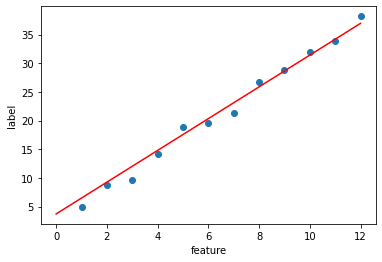

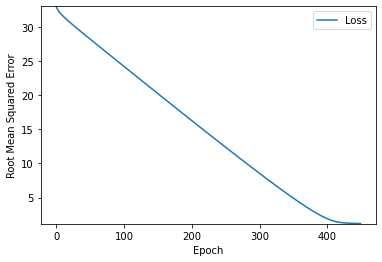

In [17]:
#@title Double-click to view a possible solution
learning_rate=0.01
epochs=450
my_batch_size=12 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# The loss curve suggests that the model does converge.

## Task 3: Increase the learning rate

In Task 2, you increased the number of epochs to get the model to converge. Sometimes, you can get the model to converge more quickly by increasing the learning rate. However, setting the learning rate too high often makes it impossible for a model to converge. In Task 3, we've intentionally set the learning rate too high. Run the following code cell and see what happens.

Train on 12 samples
Epoch 1/500
12/12 [==============================] - 0s 22ms/sample - loss: 123.8596 - root_mean_squared_error: 11.1292
Epoch 2/500
12/12 [==============================] - 0s 499us/sample - loss: 6758916.5000 - root_mean_squared_error: 2599.7917
Epoch 3/500
12/12 [==============================] - 0s 499us/sample - loss: 123.3905 - root_mean_squared_error: 11.1081
Epoch 4/500
12/12 [==============================] - 0s 665us/sample - loss: 1.4413 - root_mean_squared_error: 1.2005
Epoch 5/500
12/12 [==============================] - 0s 831us/sample - loss: 1.0187 - root_mean_squared_error: 1.0093
Epoch 6/500
12/12 [==============================] - 0s 749us/sample - loss: 1.0049 - root_mean_squared_error: 1.0025
Epoch 7/500
12/12 [==============================] - 0s 831us/sample - loss: 0.9965 - root_mean_squared_error: 0.9982
Epoch 8/500
12/12 [==============================] - 0s 637us/sample - loss: 0.9883 - root_mean_squared_error: 0.9941
Epoch 9/500
12/12 [===

Epoch 68/500
12/12 [==============================] - 0s 665us/sample - loss: 334513.5938 - root_mean_squared_error: 578.3715
Epoch 69/500
12/12 [==============================] - 0s 665us/sample - loss: 354166.0312 - root_mean_squared_error: 595.1185
Epoch 70/500
12/12 [==============================] - 0s 582us/sample - loss: 301357.5312 - root_mean_squared_error: 548.9604
Epoch 71/500
12/12 [==============================] - 0s 831us/sample - loss: 225099.1719 - root_mean_squared_error: 474.4462
Epoch 72/500
12/12 [==============================] - 0s 748us/sample - loss: 162882.8750 - root_mean_squared_error: 403.5875
Epoch 73/500
12/12 [==============================] - 0s 747us/sample - loss: 122631.9375 - root_mean_squared_error: 350.1884
Epoch 74/500
12/12 [==============================] - 0s 748us/sample - loss: 100100.2266 - root_mean_squared_error: 316.3862
Epoch 75/500
12/12 [==============================] - 0s 748us/sample - loss: 90271.5000 - root_mean_squared_error: 30

Epoch 133/500
12/12 [==============================] - 0s 831us/sample - loss: 168219.3281 - root_mean_squared_error: 410.1455
Epoch 134/500
12/12 [==============================] - 0s 958us/sample - loss: 170378.7344 - root_mean_squared_error: 412.7696
Epoch 135/500
12/12 [==============================] - 0s 1ms/sample - loss: 172353.5000 - root_mean_squared_error: 415.1548
Epoch 136/500
12/12 [==============================] - 0s 914us/sample - loss: 173753.9844 - root_mean_squared_error: 416.8381
Epoch 137/500
12/12 [==============================] - 0s 748us/sample - loss: 174339.1250 - root_mean_squared_error: 417.5394
Epoch 138/500
12/12 [==============================] - 0s 997us/sample - loss: 174064.3125 - root_mean_squared_error: 417.2101
Epoch 139/500
12/12 [==============================] - 0s 831us/sample - loss: 173075.6406 - root_mean_squared_error: 416.0236
Epoch 140/500
12/12 [==============================] - 0s 914us/sample - loss: 171655.2031 - root_mean_squared_er

Epoch 198/500
12/12 [==============================] - 0s 748us/sample - loss: 170270.2656 - root_mean_squared_error: 412.6382
Epoch 199/500
12/12 [==============================] - 0s 817us/sample - loss: 170266.5781 - root_mean_squared_error: 412.6337
Epoch 200/500
12/12 [==============================] - 0s 831us/sample - loss: 170293.4531 - root_mean_squared_error: 412.6663
Epoch 201/500
12/12 [==============================] - 0s 831us/sample - loss: 170342.4219 - root_mean_squared_error: 412.7256
Epoch 202/500
12/12 [==============================] - 0s 748us/sample - loss: 170401.5625 - root_mean_squared_error: 412.7972
Epoch 203/500
12/12 [==============================] - 0s 748us/sample - loss: 170457.9844 - root_mean_squared_error: 412.8656
Epoch 204/500
12/12 [==============================] - 0s 748us/sample - loss: 170500.6875 - root_mean_squared_error: 412.9173
Epoch 205/500
12/12 [==============================] - 0s 748us/sample - loss: 170522.4531 - root_mean_squared_

Epoch 263/500
12/12 [==============================] - 0s 914us/sample - loss: 170419.0625 - root_mean_squared_error: 412.8185
Epoch 264/500
12/12 [==============================] - 0s 831us/sample - loss: 170416.8281 - root_mean_squared_error: 412.8157
Epoch 265/500
12/12 [==============================] - 0s 914us/sample - loss: 170414.9375 - root_mean_squared_error: 412.8134
Epoch 266/500
12/12 [==============================] - 0s 831us/sample - loss: 170413.7500 - root_mean_squared_error: 412.8120
Epoch 267/500
12/12 [==============================] - 0s 748us/sample - loss: 170413.4844 - root_mean_squared_error: 412.8117
Epoch 268/500
12/12 [==============================] - 0s 831us/sample - loss: 170413.9375 - root_mean_squared_error: 412.8122
Epoch 269/500
12/12 [==============================] - 0s 831us/sample - loss: 170415.1250 - root_mean_squared_error: 412.8137
Epoch 270/500
12/12 [==============================] - 0s 831us/sample - loss: 170416.6719 - root_mean_squared_

Epoch 328/500
12/12 [==============================] - 0s 831us/sample - loss: 170417.7344 - root_mean_squared_error: 412.8168
Epoch 329/500
12/12 [==============================] - 0s 914us/sample - loss: 170417.8906 - root_mean_squared_error: 412.8170
Epoch 330/500
12/12 [==============================] - 0s 997us/sample - loss: 170417.9844 - root_mean_squared_error: 412.8171
Epoch 331/500
12/12 [==============================] - 0s 997us/sample - loss: 170418.0000 - root_mean_squared_error: 412.8171
Epoch 332/500
12/12 [==============================] - 0s 914us/sample - loss: 170417.9219 - root_mean_squared_error: 412.8170
Epoch 333/500
12/12 [==============================] - 0s 748us/sample - loss: 170417.7344 - root_mean_squared_error: 412.8168
Epoch 334/500
12/12 [==============================] - 0s 831us/sample - loss: 170417.5000 - root_mean_squared_error: 412.8166
Epoch 335/500
12/12 [==============================] - 0s 831us/sample - loss: 170417.3594 - root_mean_squared_

Epoch 393/500
12/12 [==============================] - 0s 1ms/sample - loss: 170417.6250 - root_mean_squared_error: 412.8167
Epoch 394/500
12/12 [==============================] - 0s 998us/sample - loss: 170417.6406 - root_mean_squared_error: 412.8167
Epoch 395/500
12/12 [==============================] - 0s 830us/sample - loss: 170417.5469 - root_mean_squared_error: 412.8166
Epoch 396/500
12/12 [==============================] - 0s 831us/sample - loss: 170417.5156 - root_mean_squared_error: 412.8166
Epoch 397/500
12/12 [==============================] - 0s 914us/sample - loss: 170417.4375 - root_mean_squared_error: 412.8165
Epoch 398/500
12/12 [==============================] - 0s 914us/sample - loss: 170417.4531 - root_mean_squared_error: 412.8165
Epoch 399/500
12/12 [==============================] - 0s 748us/sample - loss: 170417.4531 - root_mean_squared_error: 412.8165
Epoch 400/500
12/12 [==============================] - 0s 748us/sample - loss: 170417.5156 - root_mean_squared_er

Epoch 458/500
12/12 [==============================] - 0s 665us/sample - loss: 170417.3906 - root_mean_squared_error: 412.8164
Epoch 459/500
12/12 [==============================] - 0s 748us/sample - loss: 170417.5156 - root_mean_squared_error: 412.8166
Epoch 460/500
12/12 [==============================] - 0s 748us/sample - loss: 170417.5156 - root_mean_squared_error: 412.8166
Epoch 461/500
12/12 [==============================] - 0s 748us/sample - loss: 170417.6562 - root_mean_squared_error: 412.8167
Epoch 462/500
12/12 [==============================] - 0s 831us/sample - loss: 170417.7031 - root_mean_squared_error: 412.8168
Epoch 463/500
12/12 [==============================] - 0s 748us/sample - loss: 170417.7031 - root_mean_squared_error: 412.8168
Epoch 464/500
12/12 [==============================] - 0s 748us/sample - loss: 170417.5938 - root_mean_squared_error: 412.8167
Epoch 465/500
12/12 [==============================] - 0s 914us/sample - loss: 170417.5469 - root_mean_squared_

C:\Users\Christopher.Chapa\Anaconda3\envs\tensorflow-development\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


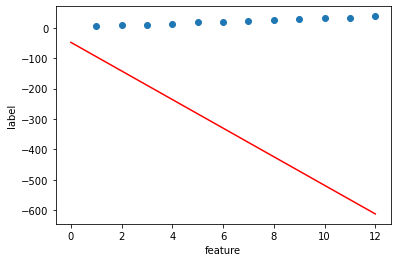

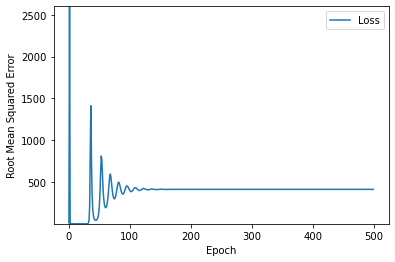

In [18]:
# Increase the learning rate and decrease the number of epochs.
learning_rate=100 
epochs=500 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

The resulting model is terrible; the red line doesn't align with the blue dots. Furthermore, the loss curve oscillates like a [roller coaster](https://www.wikipedia.org/wiki/Roller_coaster).  An oscillating loss curve strongly suggests that the learning rate is too high. 

## Task 4: Find the ideal combination of epochs and learning rate

Assign values to the following two hyperparameters to make training converge as efficiently as possible: 

*  learning_rate
*  epochs

Train on 12 samples
Epoch 1/75
12/12 [==============================] - 0s 21ms/sample - loss: 1146.8029 - root_mean_squared_error: 33.8645
Epoch 2/75
12/12 [==============================] - 0s 582us/sample - loss: 897.0878 - root_mean_squared_error: 29.9514
Epoch 3/75
12/12 [==============================] - 0s 582us/sample - loss: 744.4111 - root_mean_squared_error: 27.2839
Epoch 4/75
12/12 [==============================] - 0s 817us/sample - loss: 632.1025 - root_mean_squared_error: 25.1416
Epoch 5/75
12/12 [==============================] - 0s 748us/sample - loss: 543.1354 - root_mean_squared_error: 23.3053
Epoch 6/75
12/12 [==============================] - 0s 665us/sample - loss: 469.8091 - root_mean_squared_error: 21.6751
Epoch 7/75
12/12 [==============================] - 0s 813us/sample - loss: 407.8952 - root_mean_squared_error: 20.1964
Epoch 8/75
12/12 [==============================] - 0s 831us/sample - loss: 354.7856 - root_mean_squared_error: 18.8358
Epoch 9/75
12/12 [==

Epoch 70/75
12/12 [==============================] - 0s 582us/sample - loss: 1.1555 - root_mean_squared_error: 1.0749
Epoch 71/75
12/12 [==============================] - 0s 582us/sample - loss: 1.1387 - root_mean_squared_error: 1.0671
Epoch 72/75
12/12 [==============================] - 0s 582us/sample - loss: 1.1221 - root_mean_squared_error: 1.0593
Epoch 73/75
12/12 [==============================] - 0s 665us/sample - loss: 1.1058 - root_mean_squared_error: 1.0516
Epoch 74/75
12/12 [==============================] - 0s 582us/sample - loss: 1.0898 - root_mean_squared_error: 1.0439
Epoch 75/75
12/12 [==============================] - 0s 332us/sample - loss: 1.0742 - root_mean_squared_error: 1.0364


C:\Users\Christopher.Chapa\Anaconda3\envs\tensorflow-development\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


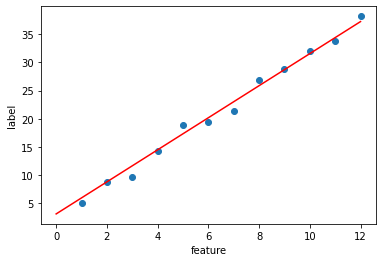

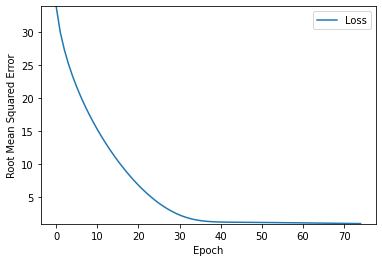

In [27]:
# Set the learning rate and number of epochs
learning_rate= .15  # Replace ? with a floating-point number
epochs= 75   # Replace ? with an integer

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Train on 12 samples
Epoch 1/70
12/12 [==============================] - 0s 19ms/sample - loss: 318.7119 - root_mean_squared_error: 17.8525
Epoch 2/70
12/12 [==============================] - 0s 497us/sample - loss: 201.7421 - root_mean_squared_error: 14.2036
Epoch 3/70
12/12 [==============================] - 0s 665us/sample - loss: 140.7074 - root_mean_squared_error: 11.8620
Epoch 4/70
12/12 [==============================] - 0s 667us/sample - loss: 101.4222 - root_mean_squared_error: 10.0709
Epoch 5/70
12/12 [==============================] - 0s 580us/sample - loss: 74.0851 - root_mean_squared_error: 8.6073
Epoch 6/70
12/12 [==============================] - 0s 665us/sample - loss: 54.3428 - root_mean_squared_error: 7.3718
Epoch 7/70
12/12 [==============================] - 0s 831us/sample - loss: 39.8209 - root_mean_squared_error: 6.3104
Epoch 8/70
12/12 [==============================] - 0s 828us/sample - loss: 29.0561 - root_mean_squared_error: 5.3904
Epoch 9/70
12/12 [===========

C:\Users\Christopher.Chapa\Anaconda3\envs\tensorflow-development\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


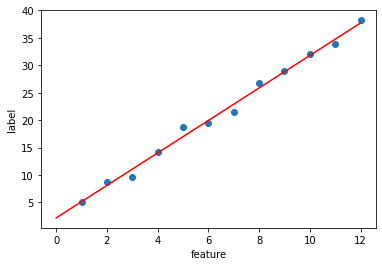

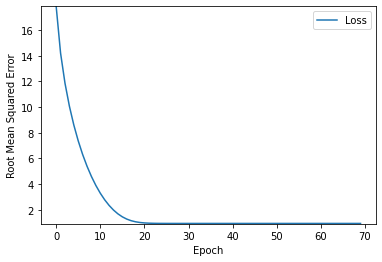

In [23]:
#@title Double-click to view a possible solution

learning_rate=0.14
epochs=70
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Task 5: Adjust the batch size

The system recalculates the model's loss value and adjusts the model's weights and bias after each **iteration**.  Each iteration is the span in which the system processes one batch. For example, if the **batch size** is 6, then the system recalculates the model's loss value and adjusts the model's weights and bias after processing every 6 examples.  

One **epoch** spans sufficient iterations to process every example in the dataset. For example, if the batch size is 12, then each epoch lasts one iteration. However, if the batch size is 6, then each epoch consumes two iterations.  

It is tempting to simply set the batch size to the number of examples in the dataset (12, in this case). However, the model might actually train faster on smaller batches. Conversely, very small batches might not contain enough information to help the model converge. 

Experiment with `batch_size` in the following code cell. What's the smallest integer you can set for `batch_size` and still have the model converge in a hundred epochs?

Train on 12 samples
Epoch 1/100
12/12 [==============================] - 0s 23ms/sample - loss: 391.9011 - root_mean_squared_error: 19.7965
Epoch 2/100
12/12 [==============================] - 0s 831us/sample - loss: 288.4546 - root_mean_squared_error: 16.9840
Epoch 3/100
12/12 [==============================] - 0s 1ms/sample - loss: 229.6925 - root_mean_squared_error: 15.1556
Epoch 4/100
12/12 [==============================] - 0s 1ms/sample - loss: 185.4877 - root_mean_squared_error: 13.6194
Epoch 5/100
12/12 [==============================] - 0s 1ms/sample - loss: 148.6361 - root_mean_squared_error: 12.1916
Epoch 6/100
12/12 [==============================] - 0s 1ms/sample - loss: 117.8031 - root_mean_squared_error: 10.8537
Epoch 7/100
12/12 [==============================] - 0s 1ms/sample - loss: 91.5841 - root_mean_squared_error: 9.5700
Epoch 8/100
12/12 [==============================] - 0s 1ms/sample - loss: 69.9120 - root_mean_squared_error: 8.3613
Epoch 9/100
12/12 [==========

12/12 [==============================] - 0s 2ms/sample - loss: 1.1063 - root_mean_squared_error: 1.0518
Epoch 71/100
12/12 [==============================] - 0s 2ms/sample - loss: 0.8982 - root_mean_squared_error: 0.9477
Epoch 72/100
12/12 [==============================] - 0s 2ms/sample - loss: 0.9088 - root_mean_squared_error: 0.9533
Epoch 73/100
12/12 [==============================] - 0s 2ms/sample - loss: 1.2089 - root_mean_squared_error: 1.0995
Epoch 74/100
12/12 [==============================] - 0s 2ms/sample - loss: 1.0007 - root_mean_squared_error: 1.0003
Epoch 75/100
12/12 [==============================] - 0s 2ms/sample - loss: 0.9549 - root_mean_squared_error: 0.9772
Epoch 76/100
12/12 [==============================] - 0s 1ms/sample - loss: 0.9464 - root_mean_squared_error: 0.9728
Epoch 77/100
12/12 [==============================] - 0s 2ms/sample - loss: 0.9457 - root_mean_squared_error: 0.9725
Epoch 78/100
12/12 [==============================] - 0s 2ms/sample - loss: 1

C:\Users\Christopher.Chapa\Anaconda3\envs\tensorflow-development\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


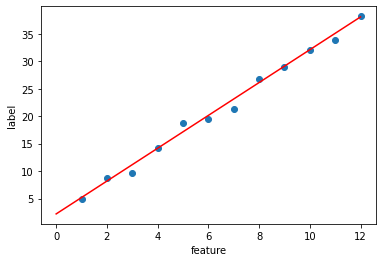

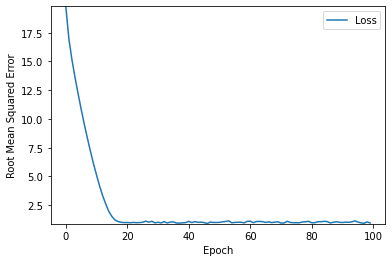

In [30]:
learning_rate=0.05
epochs=100
my_batch_size= 3  # Replace ? with an integer.

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Train on 12 samples
Epoch 1/125
12/12 [==============================] - 0s 21ms/sample - loss: 991.5147 - root_mean_squared_error: 31.4883
Epoch 2/125
12/12 [==============================] - 0s 2ms/sample - loss: 720.3291 - root_mean_squared_error: 26.8389
Epoch 3/125
12/12 [==============================] - 0s 2ms/sample - loss: 540.6737 - root_mean_squared_error: 23.2524
Epoch 4/125
12/12 [==============================] - 0s 2ms/sample - loss: 395.9568 - root_mean_squared_error: 19.8987
Epoch 5/125
12/12 [==============================] - 0s 2ms/sample - loss: 278.1150 - root_mean_squared_error: 16.6768
Epoch 6/125
12/12 [==============================] - 0s 2ms/sample - loss: 180.7101 - root_mean_squared_error: 13.4428
Epoch 7/125
12/12 [==============================] - 0s 2ms/sample - loss: 108.4807 - root_mean_squared_error: 10.4154
Epoch 8/125
12/12 [==============================] - 0s 2ms/sample - loss: 57.8422 - root_mean_squared_error: 7.6054
Epoch 9/125
12/12 [==========

12/12 [==============================] - 0s 2ms/sample - loss: 1.1053 - root_mean_squared_error: 1.0513
Epoch 71/125
12/12 [==============================] - 0s 2ms/sample - loss: 1.3036 - root_mean_squared_error: 1.1417
Epoch 72/125
12/12 [==============================] - 0s 2ms/sample - loss: 1.1647 - root_mean_squared_error: 1.0792
Epoch 73/125
12/12 [==============================] - 0s 2ms/sample - loss: 1.2722 - root_mean_squared_error: 1.1279
Epoch 74/125
12/12 [==============================] - 0s 2ms/sample - loss: 1.1636 - root_mean_squared_error: 1.0787
Epoch 75/125
12/12 [==============================] - 0s 2ms/sample - loss: 1.1580 - root_mean_squared_error: 1.0761
Epoch 76/125
12/12 [==============================] - 0s 2ms/sample - loss: 1.1054 - root_mean_squared_error: 1.0514
Epoch 77/125
12/12 [==============================] - 0s 2ms/sample - loss: 1.2350 - root_mean_squared_error: 1.1113
Epoch 78/125
12/12 [==============================] - 0s 2ms/sample - loss: 1

C:\Users\Christopher.Chapa\Anaconda3\envs\tensorflow-development\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


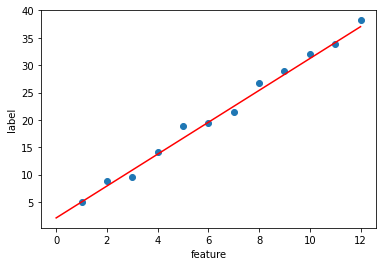

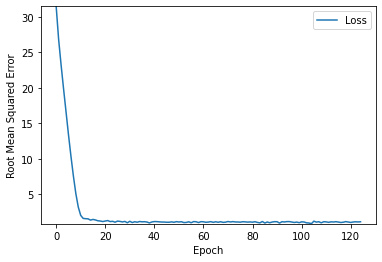

In [31]:
#@title Double-click to view a possible solution

learning_rate=0.05
epochs=125
my_batch_size=1 # Wow, a batch size of 1 works!

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)


## Summary of hyperparameter tuning

Most machine learning problems require a lot of hyperparameter tuning.  Unfortunately, we can't provide concrete tuning rules for every model. Lowering the learning rate can help one model converge efficiently but make another model converge much too slowly.  You must experiment to find the best set of hyperparameters for your dataset. That said, here are a few rules of thumb:

 * Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero. 
 * If the training loss does not converge, train for more epochs.
 * If the training loss decreases too slowly, increase the learning rate. Note that setting the learning rate too high may also prevent training loss from converging.
 * If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate.
 * Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination.
 * Setting the batch size to a *very* small batch number can also cause instability. First, try large batch size values. Then, decrease the batch size until you see degradation.
 * For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory. In such cases, you'll need to reduce the batch size to enable a batch to fit into memory. 

Remember: the ideal combination of hyperparameters is data dependent, so you must always experiment and verify.